In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
from keras.optimizers import SGD
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [4]:
X = data.drop(columns=['diagnosis', 'id', 'Unnamed: 32'])
y = data['diagnosis']

In [5]:
# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
def create_model():
    model = Sequential()
    model.add(Dense(units=16, activation='relu', input_dim=X.shape[1]))
    model.add(Dense(units=8, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
    # adam = Adam(lr=0.01)
    # model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [7]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

fold_accuracies = []
all_predictions = []
all_true_labels = []

2023-10-31 18:30:20.611108: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 1ms/step


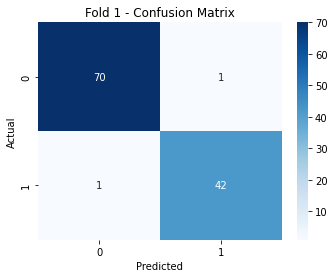

/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 918us/step


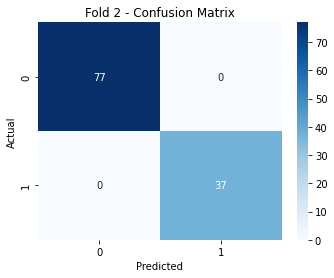

/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 945us/step


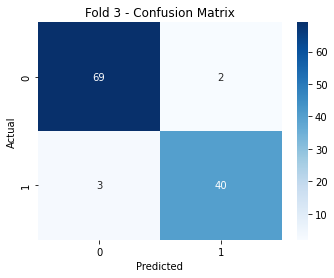

/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 939us/step


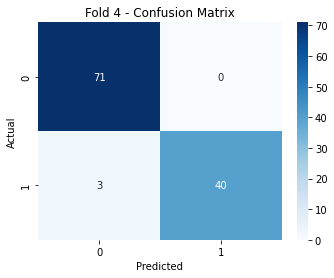

/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 916us/step


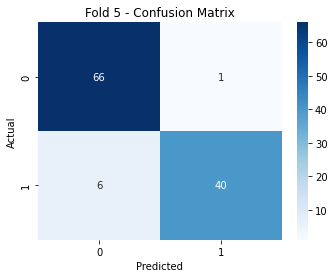

In [8]:
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_model()
    history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5)

    all_predictions.extend(y_pred)
    all_true_labels.extend(y_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

    fold_accuracies.append(accuracy)

    # Plot evaluation metrics for this fold
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Fold {fold} - Confusion Matrix")

    plt.show()

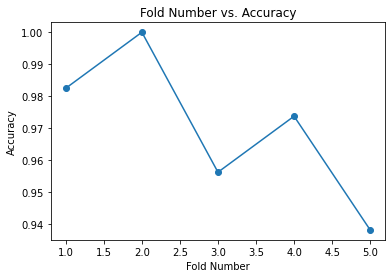

In [9]:
plt.figure()
plt.plot(range(1, num_folds + 1), fold_accuracies, marker='o')
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.title("Fold Number vs. Accuracy")
plt.show()

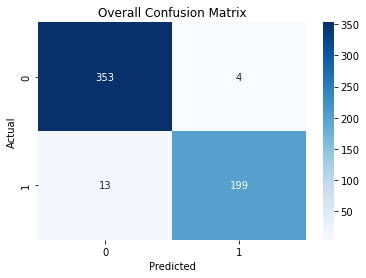

In [10]:
overall_confusion = confusion_matrix(all_true_labels, all_predictions)
plt.figure()
sns.heatmap(overall_confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Overall Confusion Matrix")
plt.show()

In [11]:
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print(f'Mean Precision: {mean_precision} ± {std_precision}')
print(f'Mean Recall: {mean_recall} ± {std_recall}')
print(f'Mean F1-score: {mean_f1} ± {std_f1}')
print(f'Mean Accuracy: {mean_accuracy} ± {std_accuracy}')

Mean Precision: 0.980946978905005 ± 0.017822471838514622
Mean Recall: 0.9413549039433772 ± 0.0449284338183986
Mean F1-score: 0.9602632616413102 ± 0.027879037883519146
Mean Accuracy: 0.9700667598199038 ± 0.021360716365899753
